In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.shape)
print(test.shape)

train.head()


(10050, 25)
(3203, 24)


,Unnamed: 0,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203.0,14.26,0.25,1.58,8.61,1.79,1.01,1.40,457.14,423.07,...,Superheated,37.9,-1.0,152.0,18.0,2.0,19.75,5.70,3.1,0.588298
1,3204.0,14.14,0.25,1.59,8.58,1.81,1.00,1.41,457.71,422.82,...,Superheated,37.9,-1.0,152.0,19.0,3.0,20.00,-5.15,-1.5,0.551524
2,3205.0,14.05,0.24,1.62,8.59,1.79,0.98,1.38,456.58,422.37,...,Superheated,37.9,-1.0,152.0,20.0,3.0,20.00,-5.15,0.8,0.550813
3,3206.0,14.17,0.24,1.59,8.60,1.80,0.98,1.40,456.81,423.28,...,Superheated,37.9,-1.0,152.0,21.0,3.0,20.00,-5.15,3.1,0.528906
4,3207.0,14.09,0.24,1.59,8.60,1.80,1.00,1.40,456.93,423.19,...,Superheated,37.9,-1.0,152.0,22.0,4.0,20.00,-4.90,3.4,0.454363


In [2]:
train = train.drop(columns=["Unnamed: 0"])


In [3]:
train["Liquid Boiling Temperature (K)"] = train["Liquid Boiling Temperature (K)"].astype("category")
train["BoilingTemp_Code"] = (train["Liquid Boiling Temperature (K)"] == -42).astype(int)
train = train.drop(columns=["Liquid Boiling Temperature (K)"])
train["BoilingTemp_Code"].value_counts()



0    5445
1    4605
Name: BoilingTemp_Code, dtype: int64

In [4]:
train.loc[train["BLEVE Height (m)"] < 0, "BLEVE Height (m)"] = np.nan

In [5]:
train["Status"] = train["Status"].str.lower().str.strip()
train["Status"] = train["Status"].replace({
    "saperheated": "superheated",
    "superheat": "superheated",
    "subcoled": "subcooled",
    "subcool": "subcooled"
})


In [6]:
from sklearn.impute import SimpleImputer
cat_cols = train.select_dtypes(include='object').columns

cat_imputer = SimpleImputer(strategy='most_frequent')
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])

In [7]:
train.describe()

,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),...,Obstacle Angle,Liquid Critical Pressure (bar),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),BoilingTemp_Code
count,10040.000000,10041.000000,10043.000000,10045.000000,10042.000000,9882.000000,10041.000000,10022.000000,10022.000000,10042.000000,...,10042.000000,10022.000000,10021.000000,10042.000000,10040.000000,10043.000000,10041.000000,10043.000000,10044.000000,10050.000000
mean,37.983131,0.494445,1.726197,5.525386,1.641390,1.045652,0.855979,398.850036,343.708088,11.232523,...,14.099781,40.012273,126.576679,14.007469,2.334960,12.945712,2.910915,3.105118,0.361770,0.458209
std,233.864180,0.227213,0.763225,2.631281,0.728311,0.561495,0.537254,71.504617,36.609621,4.021430,...,9.209574,2.292440,27.561571,7.791977,1.334432,4.164641,4.638664,4.263664,0.505487,0.498275
min,4.890000,0.100000,0.380000,0.580000,0.380000,0.000000,0.180000,281.130000,282.540000,5.000000,...,0.000000,37.900000,96.700000,1.000000,1.000000,5.150000,-9.050000,-2.900000,0.016098,0.000000
25%,13.177500,0.280000,1.010000,3.210000,1.010000,0.590000,0.410000,341.940000,312.580000,8.000000,...,6.000000,37.900000,96.700000,7.000000,1.000000,9.350000,-0.150000,-0.600000,0.102128,0.000000
50%,21.375000,0.510000,1.790000,5.410000,1.600000,1.020000,0.780000,389.165000,342.320000,11.000000,...,14.000000,37.900000,152.000000,14.000000,2.000000,12.750000,2.700000,2.300000,0.203185,0.000000
75%,32.822500,0.680000,2.400000,7.820000,2.210000,1.590000,1.210000,445.000000,367.990000,14.000000,...,21.000000,42.500000,152.000000,21.000000,3.000000,16.250000,6.150000,5.500000,0.413152,1.000000
max,4882.573607,0.900000,3.020000,10.020000,3.020000,2.020000,2.620000,573.880000,425.120000,20.000000,...,30.000000,42.500000,152.000000,27.000000,5.000000,23.750000,19.550000,16.000000,9.170477,1.000000


In [8]:
num_cols = train.select_dtypes(include="number").columns

imputer = SimpleImputer(strategy="median")
train[num_cols] = imputer.fit_transform(train[num_cols])

In [9]:
train["Status"] = (train["Status"] == "superheated").astype(int)


In [10]:
int_cols = train.select_dtypes(include=["int64", "int32"]).columns

train[int_cols] = train[int_cols].astype("float64")

In [11]:
train["Tank_Volume"] = (
    train["Tank Width (m)"] *
    train["Tank Length (m)"] *
    train["Tank Height (m)"]
)
train["Vapour_Ratio"] = (
    train["Vapour Height (m)"] /
    train["Tank Height (m)"]
)
train["Distance_Ratio"] = (
    train["Obstacle Distance to BLEVE (m)"] /
    train["Tank Height (m)"]
)


In [12]:
train.head()

,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),...,Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),BoilingTemp_Code,Tank_Volume,Vapour_Ratio,Distance_Ratio
0,14.26,0.25,1.58,8.61,1.79,1.01,1.40,457.14,423.07,19.0,...,18.0,2.0,19.75,5.70,3.1,0.588298,0.0,24.350802,0.782123,10.614525
1,14.14,0.25,1.59,8.58,1.81,1.00,1.41,457.71,422.82,19.0,...,19.0,3.0,20.00,-5.15,-1.5,0.551524,0.0,24.692382,0.779006,10.497238
2,14.05,0.24,1.62,8.59,1.79,0.98,1.38,456.58,422.37,19.0,...,20.0,3.0,20.00,-5.15,0.8,0.550813,0.0,24.909282,0.770950,10.614525
3,14.17,0.24,1.59,8.60,1.80,0.98,1.40,456.81,423.28,19.0,...,21.0,3.0,20.00,-5.15,3.1,0.528906,0.0,24.613200,0.777778,10.555556
4,14.09,0.24,1.59,8.60,1.80,1.00,1.40,456.93,423.19,19.0,...,22.0,4.0,20.00,-4.90,3.4,0.454363,0.0,24.613200,0.777778,10.555556


In [13]:
X = train.drop("Target Pressure (bar)", axis=1)
y = train["Target Pressure (bar)"]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [17]:
y_pred_lr = lr.predict(X_val_scaled)


In [18]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import numpy as np

r2_lr = r2_score(y_val, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_val, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))

print("Linear Regression")
print("R2:", r2_lr)
print("MAPE:", mape_lr)
print("RMSE:", rmse_lr)


Linear Regression
R2: 0.4220846787383836
MAPE: 1.166762317806586
RMSE: 0.4152788594485271


In [20]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_


In [21]:
y_pred_rf = best_rf.predict(X_val)


In [22]:
r2_rf = r2_score(y_val, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

print("Random Forest")
print("R2:", r2_rf)
print("MAPE:", mape_rf)
print("RMSE:", rmse_rf)


Random Forest
R2: 0.836303316052154
MAPE: 0.2003631328983072
RMSE: 0.22101800774971173


In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [1, 10, 50],
    "epsilon": [0.01, 0.1, 0.5],
    "kernel": ["rbf"]
}

svr = SVR()

grid_svr = GridSearchCV(
    svr,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid_svr.fit(X_train_scaled, y_train)

best_svr = grid_svr.best_estimator_


In [24]:
y_pred_svr = best_svr.predict(X_val_scaled)


In [25]:
r2_svr = r2_score(y_val, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_val, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_val, y_pred_svr))

print("SVR")
print("R2:", r2_svr)
print("MAPE:", mape_svr)
print("RMSE:", rmse_svr)


SVR
R2: 0.8339844492502162
MAPE: 0.2618067049506414
RMSE: 0.22257793260472075


In [26]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "SVR", "Random Forest"],
    "R2": [r2_lr, r2_svr, r2_rf],
    "MAPE": [mape_lr, mape_svr, mape_rf],
    "RMSE": [rmse_lr, rmse_svr, rmse_rf]
})

print(results)


               Model        R2      MAPE      RMSE
0  Linear Regression  0.422085  1.166762  0.415279
1                SVR  0.833984  0.261807  0.222578
2      Random Forest  0.836303  0.200363  0.221018


In [27]:
best_rf.fit(X, y)


RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [33]:
test_predictions = best_rf.predict(test)


In [29]:
# Tank Volume
test["Tank_Volume"] = (
    test["Tank Width (m)"] *
    test["Tank Length (m)"] *
    test["Tank Height (m)"]
)

# Vapour Ratio
test["Vapour_Ratio"] = (
    test["Vapour Height (m)"] /
    test["Tank Height (m)"]
)

# Distance Ratio
test["Distance_Ratio"] = (
    test["Obstacle Distance to BLEVE (m)"] /
    test["Tank Height (m)"]
)

# BoilingTemp_Code
test["BoilingTemp_Code"] = (
    test["Liquid Boiling Temperature (K)"] == -42
).astype(int)


In [30]:
test["Status"] = test["Status"].str.lower().str.strip()

test["Status"] = test["Status"].replace({
    "saperheated": "superheated",
    "superheat": "superheated",
    "subcoled": "subcooled",
    "subcool": "subcooled"
})

test["Status"] = (test["Status"] == "superheated").astype(int)


In [31]:
test = test.drop(columns=[
    "Simulation_ID",
    "Unnamed: 0"
], errors="ignore")


In [32]:
test = test[X.columns]


In [34]:
y_log = np.log1p(y)


In [35]:
pred = np.expm1(model.predict(X_test))


NameError: name 'model' is not defined

In [36]:
pred = np.expm1(best_rf.predict(X_test))


NameError: name 'X_test' is not defined

In [37]:
test_predictions = best_rf.predict(test)


In [38]:
submission = pd.DataFrame({
    "Id": range(len(test_predictions)),
    "Target Pressure (bar)": test_predictions
})


In [39]:
submission.head()
submission.shape


(3203, 2)

In [40]:
submission.head()



,Id,Target Pressure (bar)
0,0,0.098691
1,1,0.101644
2,2,0.105101
3,3,0.063827
4,4,0.062673


In [41]:
submission["Target Pressure (bar)"].min()


0.0362941050362177

In [42]:
submission.isnull().sum()


Id                       0
Target Pressure (bar)    0
dtype: int64

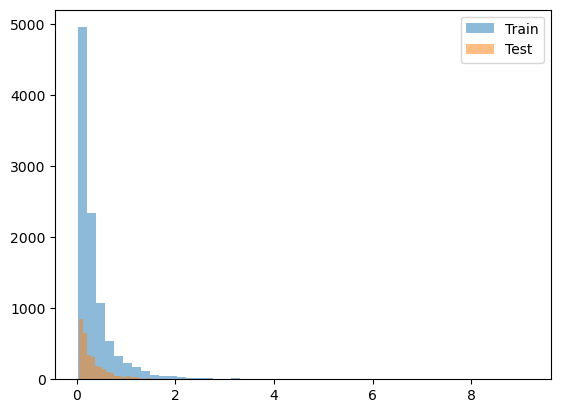

In [43]:
import matplotlib.pyplot as plt

plt.hist(y, bins=50, alpha=0.5, label="Train")
plt.hist(test_predictions, bins=50, alpha=0.5, label="Test")
plt.legend()
plt.show()


In [44]:
submission.describe()


,Id,Target Pressure (bar)
count,3203.000000,3203.000000
mean,1601.000000,0.358540
std,924.770782,0.395967
min,0.000000,0.036294
25%,800.500000,0.113495
50%,1601.000000,0.220383
75%,2401.500000,0.463254
max,3202.000000,4.048001


In [45]:


submission.to_csv("submission.csv", index=False)
